### **DEPENDENCIES**

In [10]:
import requests
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
tesdf = pd.read_csv("C:/workspace-b/amazon-ml-challenge-2024/data/test.csv")
tesdf.head()
tesdf["prediction"] = ""
tesdf.to_csv(
    "C:/workspace-b/amazon-ml-challenge-2024/data/test_with_prediction.csv",
    index=True,
)

-   "voltage": {"millivolt", "kilovolt", "volt"},
-   "wattage": {"kilowatt", "watt"},

In [5]:
s = tesdf[tesdf["entity_name"].isin(("voltage", "wattage"))]

voltage


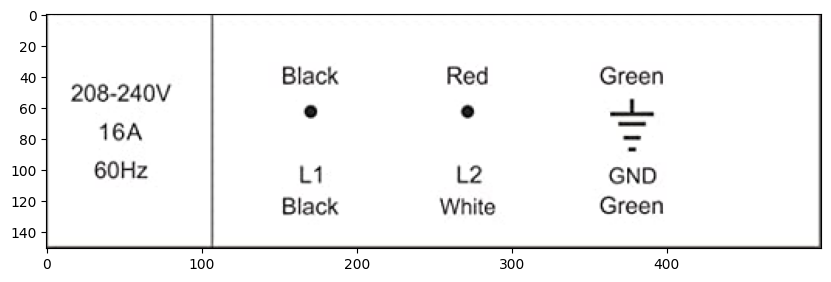

In [12]:
total_processed = 0
for i, row in s.iterrows():
    clear_output(wait=True)
    print(row["entity_name"])
    img = Image.open(requests.get(row["image_link"], stream=True).raw)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.show()
    prediction = input("Enter prediction: ")
    if prediction == "exit":
        break
    tesdf.at[i, "prediction"] = prediction
    total_processed += 1
    if total_processed % 20 == 0:
        tesdf.to_csv(
            "C:/workspace-b/amazon-ml-challenge-2024/data/test_with_prediction.csv",
            index=True,
        )
    plt.close()